<a href="https://colab.research.google.com/github/Duddu64/PDI/blob/main/TransformadaHoughLinha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

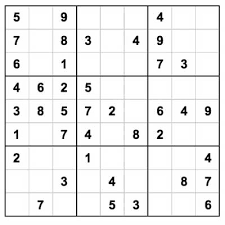

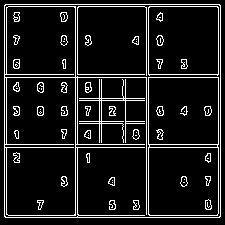

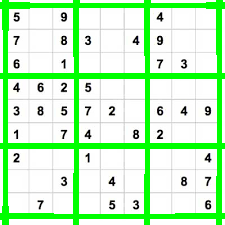

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def detect_lines(img, img_color):
    img_blur = cv2.GaussianBlur(img, (3, 3), 0)

    edges = cv2.Canny(image=img_blur, threshold1=50, threshold2=150, apertureSize=3)

    lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))


            cv2.line(img_color, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return img_color, edges

def main():

    img_color = cv2.imread('/content/images.png', cv2.IMREAD_COLOR)

    if img_color is None:
        print("Erro ao carregar a imagem.")
        return

    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    img_with_lines, edges = detect_lines(img_gray, img_color.copy())

    cv2_imshow(img_gray)
    cv2_imshow(edges)
    cv2_imshow(img_with_lines)

if __name__ == "__main__":
    main()
